# Importando bibliotecas

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib  import pyplot as plt
from scipy.stats import kurtosis, skew

# Coleta dos dados e visão geral

In [2]:
# Extraindo os dados
data = pd.read_csv('kc_house_data.csv')

In [3]:
# Visão geral dos dados
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Conferindo valores nulos
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Tipos das colunas
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Transformação dos dados

In [6]:
# Transformando a coluna date no tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Suprimindo notação científica
pd.options.display.float_format = '{:.2f}'.format

# Análise descritiva

In [7]:
# Selecionando somente colunas númericas
num_attributes = data.select_dtypes(include=['int64', 'float64'])

In [8]:
# Medidas de dispersão
media = pd.DataFrame(num_attributes.apply(np.mean))
mediana = pd.DataFrame(num_attributes.apply(np.median))
max_ = pd.DataFrame(num_attributes.apply(np.max))
min_ = pd.DataFrame(num_attributes.apply(np.min))
range_ = pd.DataFrame(num_attributes.apply(lambda column: column.max() - column.min(), axis=0))
std = pd.DataFrame(num_attributes.apply(np.std))
skew = pd.DataFrame(num_attributes.apply(skew))
kurtosis = pd.DataFrame(num_attributes.apply(kurtosis))

In [9]:
statistics = pd.concat([media, mediana, max_, min_, range_, std, skew, kurtosis], axis=1)
statistics.columns = ['mean', 'median', 'max', 'min', 'range', 'std', 'skew', 'kurtosis']
statistics

,mean,median,max,min,range,std,skew,kurtosis
id,4580301520.86,3904930410.00,9900000190.00,1000102.00,9899000088.00,2876499023.43,0.24,-1.26
price,540088.14,450000.00,7700000.00,75000.00,7625000.00,367118.70,4.02,34.58
bedrooms,3.37,3.00,33.00,0.00,33.00,0.93,1.97,49.05
bathrooms,2.11,2.25,8.00,0.00,8.00,0.77,0.51,1.28
sqft_living,2079.90,1910.00,13540.00,290.00,13250.00,918.42,1.47,5.24
sqft_lot,15106.97,7618.00,1651359.00,520.00,1650839.00,41419.55,13.06,285.01
floors,1.49,1.50,3.50,1.00,2.50,0.54,0.62,-0.48
waterfront,0.01,0.00,1.00,0.00,1.00,0.09,11.38,127.60
view,0.23,0.00,4.00,0.00,4.00,0.77,3.40,10.89
condition,3.41,3.00,5.00,1.00,4.00,0.65,1.03,0.53


# Limpeza dos dados

## Análise do imóvel com 33 quartos

In [10]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


Pela Tabela Descritiva nota-se que o há um imóvel com 33 quartos, no entanto seu preço e área de lote estão próximos dos valores médios, ou seja, seus valores estão distantes dos esperados para um imóvel dessas proporções.
Assumiremos então, que houve um erro de digitação e o imóvel será removido do dataset.

In [11]:
data = data.drop(data[data['bedrooms'] == 33].index)

# Insights

In [12]:
# Setando os parãmetros para visualização dos gráficos
sns.set()

df_h = data.copy()

## H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

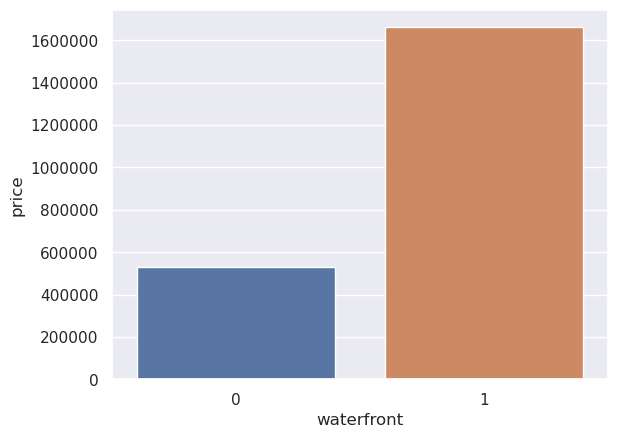

In [13]:
# Agrupando os preço dos imóveis pela vista para água
df_grouped = df_h[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

sns.barplot(data=df_grouped, x='waterfront', y='price')
plt.ticklabel_format(style='plain', axis='y')

Verdadeiro. Imóveis com vista para água são em média 212.64% mais caros.

## H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

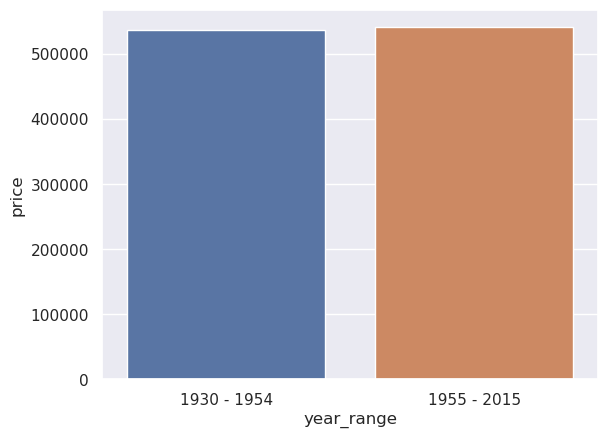

In [14]:
# Dividindo os imóveis no ano 1955
df_h['year_range'] = df_h['yr_built'].apply(lambda x: '1930 - 1954' if x < 1955 else '1955 - 2015')

# Agrupando por período
df_grouped = df_h[['price', 'year_range']].groupby('year_range').mean().reset_index()

sns.barplot(data=df_grouped, x='year_range', y='price')
plt.ticklabel_format(style='plain', axis='y')

Falso. Imóveis construídos após 1955 são em média 0.79% mais caros.

## H3: Imóveis sem porão possuem lote 50% maior do que com porão.

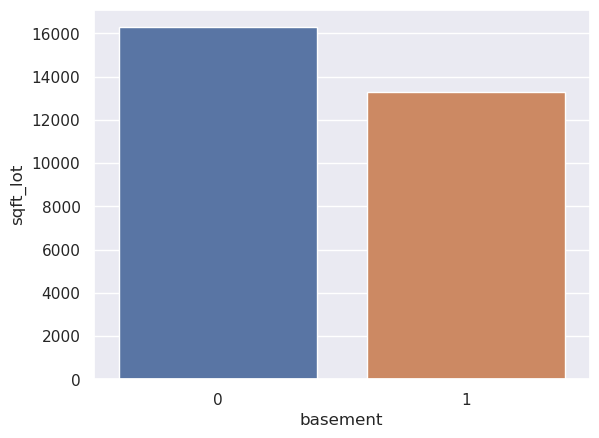

In [15]:
df_h['basement'] = df_h['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Agrupando por período
df_grouped = df_h[['sqft_lot', 'basement']].groupby('basement').mean().sort_values('sqft_lot', ascending=True).reset_index()

sns.barplot(data=df_grouped, x='basement', y='sqft_lot')
plt.ticklabel_format(style='plain', axis='y')

Falso. Imóveis sem porão são em média 22.56% mais caros.

## H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

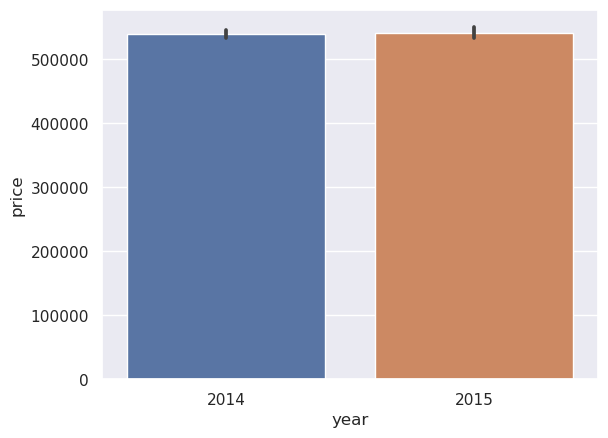

In [16]:
# Criando a coluna para ano
df_h['year'] = df_h['date'].dt.year

# Agrupando os anos e calculando a média
df_grouped = df_h[['price', 'year']].groupby('year').mean().reset_index()

sns.barplot(data=df_h, x='year', y='price');

Falso. O crescimento do preço YOY é de 0.52%.

## H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%.

0.22660950627464896

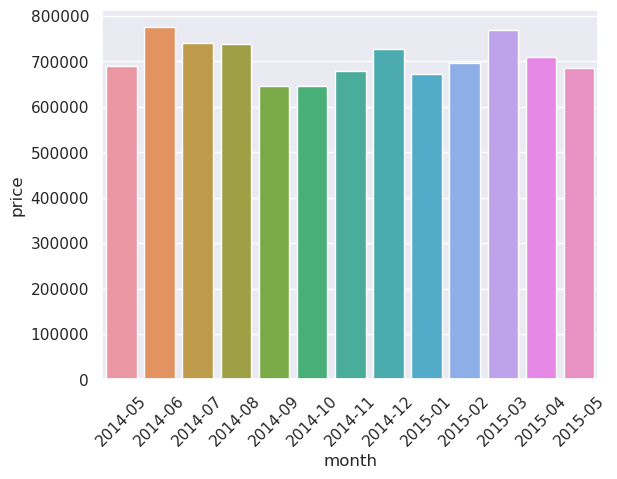

In [17]:
df_h['month'] = df_h['date'].dt.strftime('%Y-%m')

# Calculando a média dos preços dos imóveis por mês
df_grouped = df_h.loc[df_h['bathrooms'] == 3,['price', 'month']].groupby('month').mean().reset_index()

ax = sns.barplot(data=df_grouped, x='month', y='price')
plt.xticks(rotation = 45);

df_grouped['pct'] = df_grouped['price'].pct_change()*100
df_grouped['pct'].mean()

Falso. A média do crescimento MoM é de 0.22%.

## H6: Imóveis com 3 quartos tem um crescimento MoM (Month over Month) de 15%.

0.05730094795460183

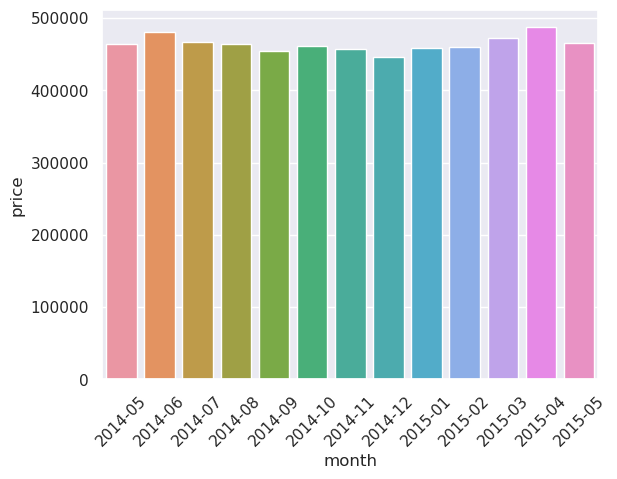

In [18]:
# Calculando a média dos preços dos imóveis por mês
df_grouped = df_h.loc[df_h['bedrooms'] == 3,['price', 'month']].groupby('month').mean().reset_index()

ax = sns.barplot(data=df_grouped, x='month', y='price')
plt.xticks(rotation = 45);

df_grouped['pct'] = df_grouped['price'].pct_change()*100
df_grouped['pct'].mean()

Falso. A média de crescimento MoM é de 0.06%.

## H7: Imóveis com qualidade de construção acima da média são 20% mais caros, na média.

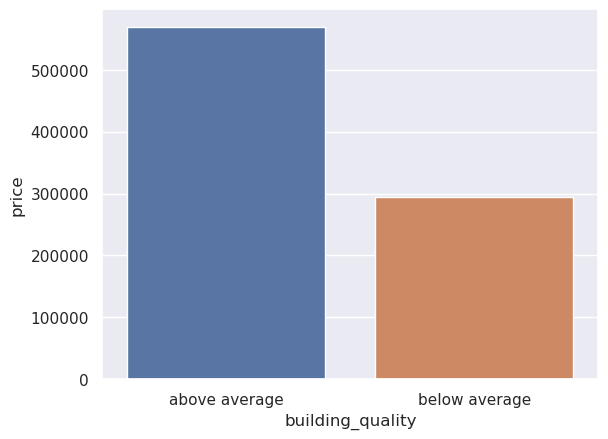

In [19]:
# Dividindo os imóveis pela qualidade de construção
df_h['building_quality'] = df_h['grade'].apply(lambda x: 'below average' if x < 7 else 'above average')

# Agrupando
df_grouped = df_h[['price', 'building_quality']].groupby('building_quality').mean().reset_index()

sns.barplot(data=df_grouped, x='building_quality', y='price')
plt.ticklabel_format(style='plain', axis='y');

Verdadeiro. Imóveis com qualidade de construção acima da média são 93% mais caros na média.

## H8: Imóveis com vista boa ou excelente são 30% mais caros, na média.

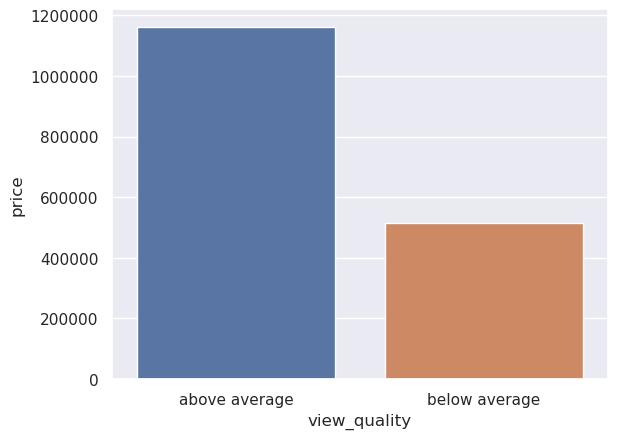

In [20]:
# Dividindo os imóveis pela qualidade da vista
df_h['view_quality'] = df_h['view'].apply(lambda x: 'below average' if x < 3 else 'above average')

# Agrupando
df_grouped = df_h[['price', 'view_quality']].groupby('view_quality').mean().reset_index()

sns.barplot(data=df_grouped, x='view_quality', y='price')
plt.ticklabel_format(style='plain', axis='y');

Verdadeiro. Imóveis com vista boa ou excelente são em média 125% mais caros.

## H9: Imoveis renovados são 10% mais caros do que os sem reforma.

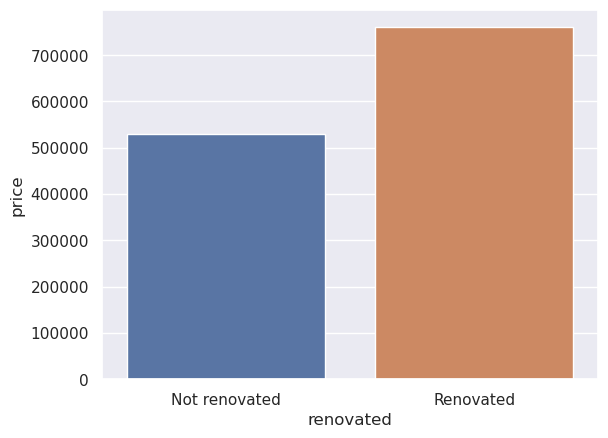

In [21]:
# Dividindo os imóveis com renovação
df_h['renovated'] = df_h['yr_renovated'].apply(lambda x: 'Not renovated' if x == 0 else 'Renovated')

# Agrupando
df_grouped = df_h[['price', 'renovated']].groupby('renovated').mean().reset_index()

sns.barplot(data=df_grouped, x='renovated', y='price')
plt.ticklabel_format(style='plain', axis='y');

Verdadeiro. Imóveis renovados são em média 0.43% mais caros.

## H10: Imóveis com porão são 10% mais caros, na média.

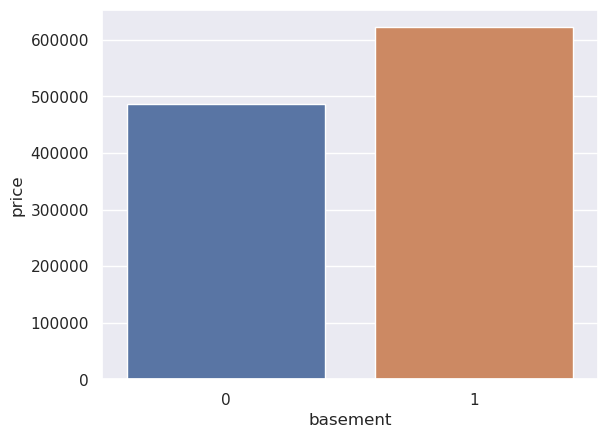

In [22]:
df_h['basement'] = df_h['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

df_grouped = df_h[['price', 'basement']].groupby('basement').mean().reset_index()

sns.barplot(data=df_grouped, x='basement', y='price')
plt.ticklabel_format(style='plain', axis='y');

Verdadeiro. Imóveis com porão são em média 27% mais caros.

# Perguntas de negócio

## 1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [23]:
df1 = data.copy()

# Agrupando os imóveis por zipcode e determinano a mediana regional
regional_price = data[['price', 'zipcode']].groupby('zipcode').median().reset_index()
regional_price.columns = ['zipcode', 'regional_price']

# Juntando os preços regionais ao dataset
df1 = pd.merge(df1, regional_price, how='inner', on='zipcode')

# Criando a coluna Status para recomendação
df1['status'] = df1.apply(lambda line: 'Buy' if ((line['price'] < line['regional_price']) &
                                                (line['condition'] >= 4)) else 'Do not buy', axis=1)

# Exportando a tabela com as recomendações
df1.to_csv('recommendations.csv', index=False)

## 2. Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

In [24]:
df2 = df1[df1['status'] == 'Buy'].copy()

# Criando os atributos de mês e estação do ano
df2['month'] = pd.to_datetime(df2['date']).dt.month
df2['season'] = df2['month'].apply(lambda x: 'Winter' if (x == 12) | (x <= 2) else
                                             'Spring' if (x >= 3) & ( x <= 5) else
                                             'Summer' if (x >= 6) & (x <= 8) else
                                             'Autumn')

# Agrupando os imóveis por zipcode e season
seasonal_price = df2[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
seasonal_price.columns = ['zipcode', 'season', 'seasonal_price']

# Incluindo os preços sazonais no dataset
df2 = pd.merge(df2, seasonal_price, how='inner', on=['zipcode', 'season'])

# Determinando o preço de venda com base na localização e mediana sazonal
df2['selling_price'] = df2.apply(lambda line: line['price']*1.3 if (line['price'] < line['seasonal_price']) else
                                line['price']*1.1, axis=1)

# Calculando o lucro
df2['revenue'] = df2.apply(lambda line: line['selling_price'] - line['price'], axis=1)

# Exportando a tabela com os valores de venda
df2 = df2.loc[:, ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'selling_price', 'revenue']]

df2.to_csv('selling_prices.csv')

# Resultados financeiros para o negócio

In [25]:
# Calculando a média de revenues
revenue_mean = df2['revenue'].mean()
revenue_mean

71771.19511554623

In [26]:
# Calculando a soma dos revenues de cada venda
revenue = df2['revenue'].sum()
revenue

273304711.00000006